In [33]:
'''
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/flood_dataset_classification.csv')'''

"\nimport pandas as pd\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\ndf = pd.read_csv('/content/drive/My Drive/flood_dataset_classification.csv')"

In [34]:
import pandas as pd
file_path = 'flood_dataset_classification.csv'
df = pd.read_csv(file_path)

In [35]:
# Import Required Libraries


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Libraries imported successfully!")

Libraries imported successfully!


In [36]:
# Load the dataset




columns_to_drop = ['Total Deaths', 'Total Affected', 'duration', 'Disaster Type']
df.drop(columns=columns_to_drop, inplace=True)


# Display first few rows of the CLEANED dataset
print("Dataset loaded and cleaned successfully. Here are the first 5 rows:")
print(df.head())

Dataset loaded and cleaned successfully. Here are the first 5 rows:
   Latitude  Longitude  time     Rainfall  Elevation      Slope  distance  \
0   52.6717    -0.2995  1900  1383.125626       11.0   1.788207       0.0   
1   35.6897   139.6920  1909  1383.125626       49.0  24.356508       0.0   
2   39.9050   116.3910  1909   580.345856       55.0   8.374380       0.0   
3   23.1288   113.2590  1912  2993.401777        7.0  12.917221       0.0   
4   39.1467   117.2060  1913  1383.125626        3.0   1.513093       0.0   

   occured  
0        1  
1        1  
2        1  
3        1  
4        1  


In [37]:
df.head()

,Latitude,Longitude,time,Rainfall,Elevation,Slope,distance,occured
0,52.6717,-0.2995,1900,1383.125626,11.0,1.788207,0.0,1
1,35.6897,139.6920,1909,1383.125626,49.0,24.356508,0.0,1
2,39.9050,116.3910,1909,580.345856,55.0,8.374380,0.0,1
3,23.1288,113.2590,1912,2993.401777,7.0,12.917221,0.0,1
4,39.1467,117.2060,1913,1383.125626,3.0,1.513093,0.0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   6237 non-null   float64
 1   Longitude  6237 non-null   float64
 2   time       6237 non-null   int64  
 3   Rainfall   6237 non-null   float64
 4   Elevation  6237 non-null   float64
 5   Slope      6237 non-null   float64
 6   distance   6237 non-null   float64
 7   occured    6237 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 389.9 KB


In [39]:
df.shape
df.describe()

,Latitude,Longitude,time,Rainfall,Elevation,Slope,distance,occured
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6.237000e+03,6237.000000
mean,18.767296,25.577775,1994.058041,1200.677851,604.385537,7.169169,5.440781e+03,0.672118
std,23.205920,75.478904,20.522141,1164.591241,855.309741,8.954785,8.607790e+04,0.469479
min,-53.162569,-175.273869,1900.000000,0.547090,-29.000000,0.000000,0.000000e+00,0.000000
25%,4.868178,-43.415278,1987.000000,489.270857,42.000000,1.854334,0.000000e+00,0.000000
50%,22.704752,30.488437,2000.000000,1029.113686,239.000000,3.704792,0.000000e+00,1.000000
75%,37.963000,92.340000,2008.000000,1524.737477,839.000000,8.656136,0.000000e+00,1.000000
max,69.968735,179.847745,2016.000000,23751.949287,6796.000000,65.991348,1.390229e+06,1.000000


In [40]:
print(df.isna().sum())

Latitude     0
Longitude    0
time         0
Rainfall     0
Elevation    0
Slope        0
distance     0
occured      0
dtype: int64


In [41]:

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_rows}")


df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")


print("\nDataset after removing duplicates. Here are the first 5 rows:")
print(df.head())

Number of duplicated rows: 203
Number of rows after removing duplicates: 6034

Dataset after removing duplicates. Here are the first 5 rows:
   Latitude  Longitude  time     Rainfall  Elevation      Slope  distance  \
0   52.6717    -0.2995  1900  1383.125626       11.0   1.788207       0.0   
1   35.6897   139.6920  1909  1383.125626       49.0  24.356508       0.0   
2   39.9050   116.3910  1909   580.345856       55.0   8.374380       0.0   
3   23.1288   113.2590  1912  2993.401777        7.0  12.917221       0.0   
4   39.1467   117.2060  1913  1383.125626        3.0   1.513093       0.0   

   occured  
0        1  
1        1  
2        1  
3        1  
4        1  


The rainfall threshold for a severe flood will be: 1526.25 mm


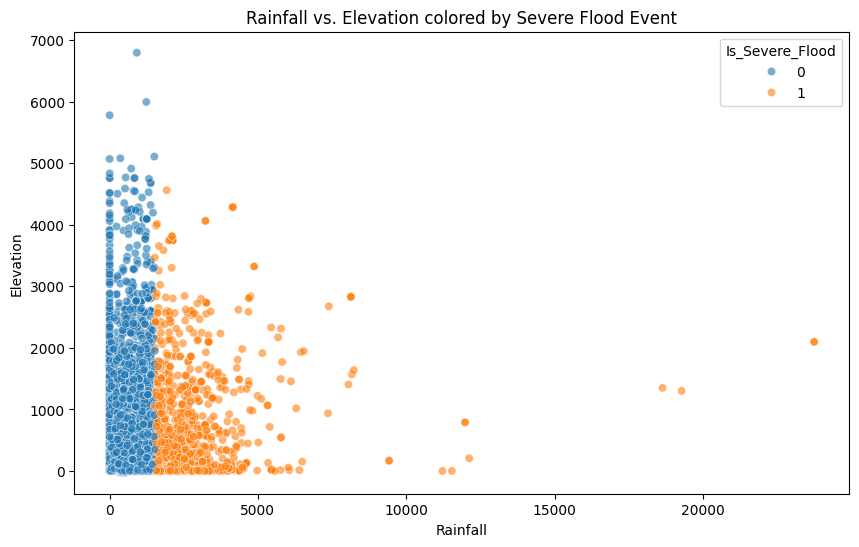

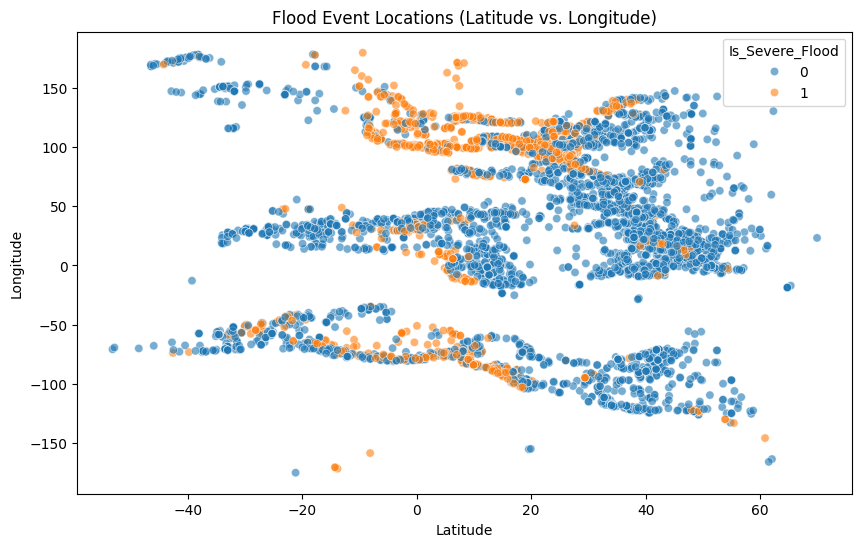

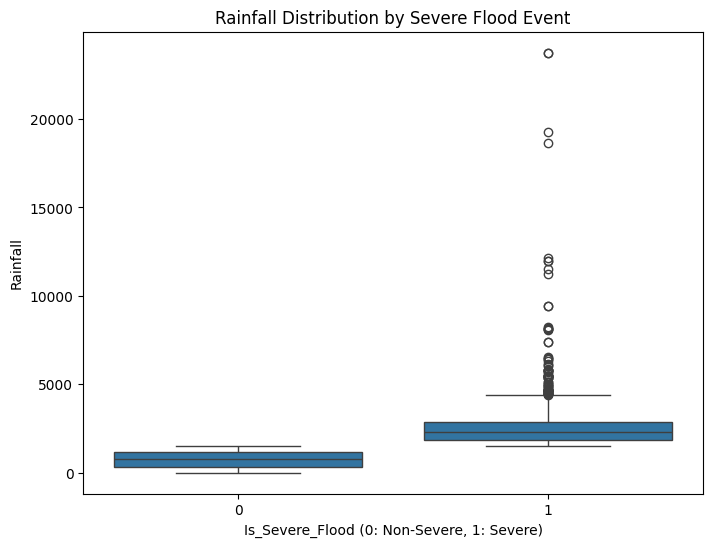

In [42]:
# Create the 'Is_Severe_Flood' column based on the rainfall threshold
rainfall_threshold = df['Rainfall'].quantile(0.75)
print(f"The rainfall threshold for a severe flood will be: {rainfall_threshold:.2f} mm")
df['Is_Severe_Flood'] = (df['Rainfall'] > rainfall_threshold).astype(int)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rainfall', y='Elevation', hue='Is_Severe_Flood', alpha=0.6)
plt.title('Rainfall vs. Elevation colored by Severe Flood Event')
plt.xlabel('Rainfall')
plt.ylabel('Elevation')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Is_Severe_Flood', alpha=0.6)
plt.title('Flood Event Locations (Latitude vs. Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Is_Severe_Flood', y='Rainfall')
plt.title('Rainfall Distribution by Severe Flood Event')
plt.xlabel('Is_Severe_Flood (0: Non-Severe, 1: Severe)')
plt.ylabel('Rainfall')
plt.show()

In [43]:
if 'occured' in df.columns:
    df.rename(columns={'occured': 'Is_Flood_Event'}, inplace=True)
else:
    print("Column 'occured' not found. We will proceed by engineering a new target.")

rainfall_threshold = df['Rainfall'].quantile(0.75)
print(f"The rainfall threshold for a severe flood will be: {rainfall_threshold:.2f} mm")

df['Is_Severe_Flood'] = (df['Rainfall'] > rainfall_threshold).astype(int)

if 'Is_Flood_Event' in df.columns:
    df.drop(columns=['Is_Flood_Event'], inplace=True)

print("\nSuccessfully created the new target variable 'Is_Severe_Flood'.")
print("Here's a look at the DataFrame with the new column:")
print(df.head())

The rainfall threshold for a severe flood will be: 1526.25 mm

Successfully created the new target variable 'Is_Severe_Flood'.
Here's a look at the DataFrame with the new column:
   Latitude  Longitude  time     Rainfall  Elevation      Slope  distance  \
0   52.6717    -0.2995  1900  1383.125626       11.0   1.788207       0.0   
1   35.6897   139.6920  1909  1383.125626       49.0  24.356508       0.0   
2   39.9050   116.3910  1909   580.345856       55.0   8.374380       0.0   
3   23.1288   113.2590  1912  2993.401777        7.0  12.917221       0.0   
4   39.1467   117.2060  1913  1383.125626        3.0   1.513093       0.0   

   Is_Severe_Flood  
0                0  
1                0  
2                0  
3                1  
4                0  


Distribution of Severe vs. Non-Severe Floods:
Is_Severe_Flood
0    4525
1    1509
Name: count, dtype: int64

Plotting distributions for key features...


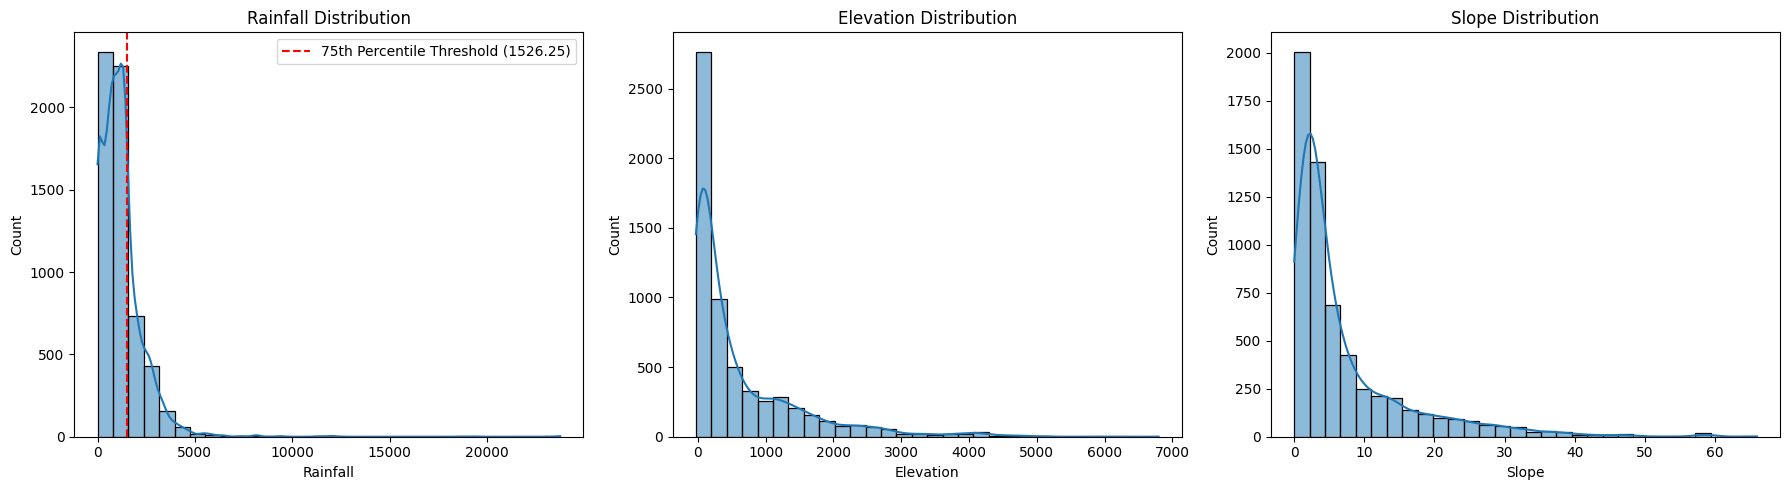

In [44]:
# Check the distribution of our new target variable
print("Distribution of Severe vs. Non-Severe Floods:")
print(df['Is_Severe_Flood'].value_counts())

print("\nPlotting distributions for key features...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Rainfall'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Rainfall Distribution')
axes[0].axvline(rainfall_threshold, color='r', linestyle='--', label=f'75th Percentile Threshold ({rainfall_threshold:.2f})')
axes[0].legend()


sns.histplot(df['Elevation'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Elevation Distribution')

sns.histplot(df['Slope'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Slope Distribution')

plt.tight_layout()
plt.show()

In [45]:

zero_distance_percentage = (df['distance'] == 0).sum() / len(df) * 100
print(f"Percentage of events with a distance of 0: {zero_distance_percentage:.2f}%")

Percentage of events with a distance of 0: 95.72%


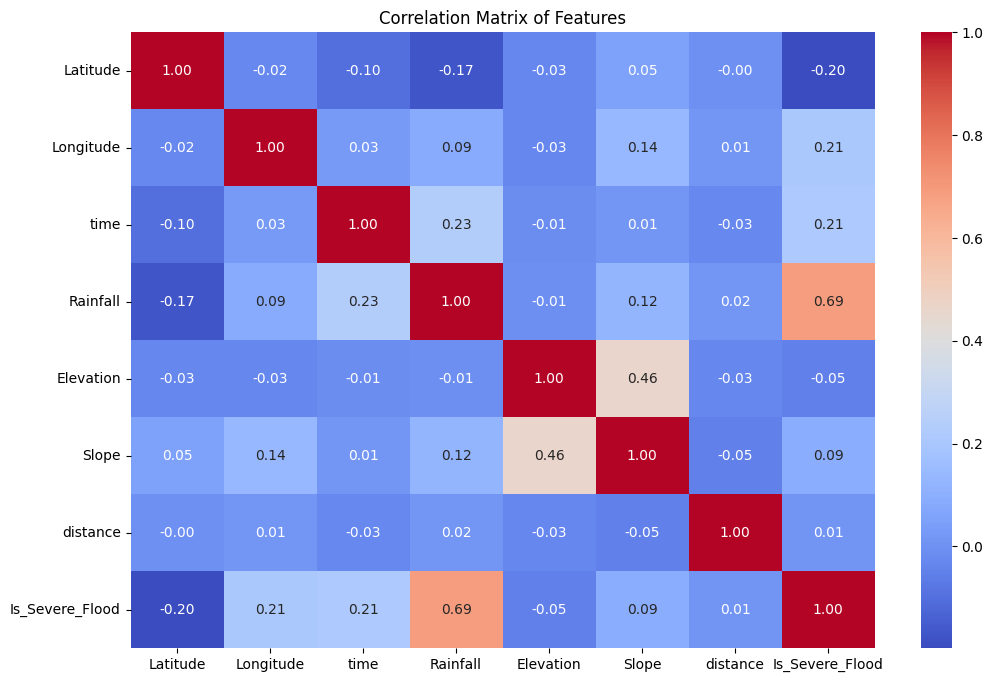

In [46]:
# Create a correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [47]:
# Define our features (X) and target (y)
X = df.drop(['Is_Severe_Flood', 'Rainfall'], axis=1)
y = df['Is_Severe_Flood']

print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,Latitude,Longitude,time,Elevation,Slope,distance
0,52.6717,-0.2995,1900,11.0,1.788207,0.0
1,35.6897,139.6920,1909,49.0,24.356508,0.0
2,39.9050,116.3910,1909,55.0,8.374380,0.0
3,23.1288,113.2590,1912,7.0,12.917221,0.0
4,39.1467,117.2060,1913,3.0,1.513093,0.0



Target (y):


0    0
1    0
2    0
3    1
4    0
Name: Is_Severe_Flood, dtype: int64

In [48]:
# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")

Training set shape: (4827, 6)
Testing set shape: (1207, 6)
Training target distribution:
Is_Severe_Flood
0    0.749948
1    0.250052
Name: proportion, dtype: float64
Testing target distribution:
Is_Severe_Flood
0    0.749793
1    0.250207
Name: proportion, dtype: float64


In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied successfully.")
print("\nShape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled testing data:", X_test_scaled.shape)
print("\nExample of scaled training data (first 5 rows):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


Feature scaling applied successfully.

Shape of scaled training data: (4827, 6)
Shape of scaled testing data: (1207, 6)

Example of scaled training data (first 5 rows):
   Latitude  Longitude      time  Elevation     Slope  distance
0  0.964118   0.698300  1.026659   2.515766  0.951922  -0.06552
1  0.458038  -1.603841  0.338731  -0.704361 -0.646013  -0.06552
2 -0.074044  -1.624176 -1.381087   1.210625  0.014305  -0.06552
3  1.367565  -1.434526 -4.132796  -0.611890 -0.700353  -0.06552
4 -0.954923   0.057977  0.338731   0.713150 -0.492478  -0.06552


In [50]:
from sklearn.linear_model import LogisticRegression



log_reg_model = LogisticRegression(random_state=42)


print("Training the Logistic Regression model...")
log_reg_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")

Training the Logistic Regression model...
Logistic Regression model trained successfully!


In [51]:


# Make predictions on the scaled testing data
print("Making predictions on the test set...")
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
print("\nEvaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Making predictions on the test set...

Evaluating the model...
Accuracy: 0.7672

Confusion Matrix:
[[864  41]
 [240  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       905
           1       0.60      0.21      0.31       302

    accuracy                           0.77      1207
   macro avg       0.69      0.58      0.58      1207
weighted avg       0.74      0.77      0.72      1207



In [52]:

print("Initializing the Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


print("Training the Random Forest model...")
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully!")

Initializing the Random Forest model...
Training the Random Forest model...
Random Forest model trained successfully!


In [53]:

print("Making predictions on the test set using the Random Forest model...")
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nEvaluating the Random Forest model...")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

Making predictions on the test set using the Random Forest model...

Evaluating the Random Forest model...
Random Forest Accuracy: 0.9362

Random Forest Confusion Matrix:
[[873  32]
 [ 45 257]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       905
           1       0.89      0.85      0.87       302

    accuracy                           0.94      1207
   macro avg       0.92      0.91      0.91      1207
weighted avg       0.94      0.94      0.94      1207



Plotting Confusion Matrix for Logistic Regression...


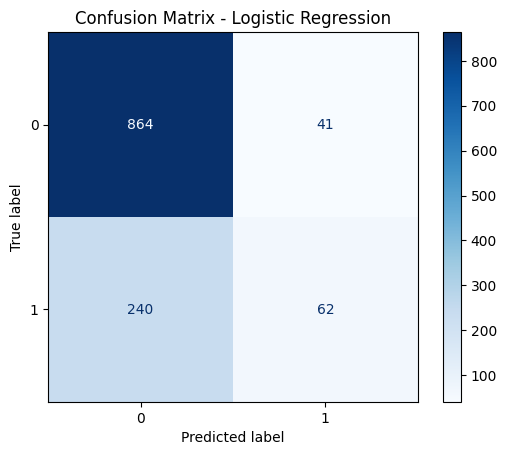


Plotting Confusion Matrix for Random Forest...


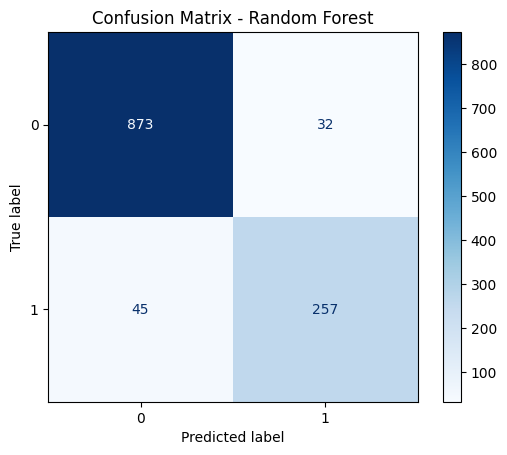


Plotting ROC AUC Curve for both models...


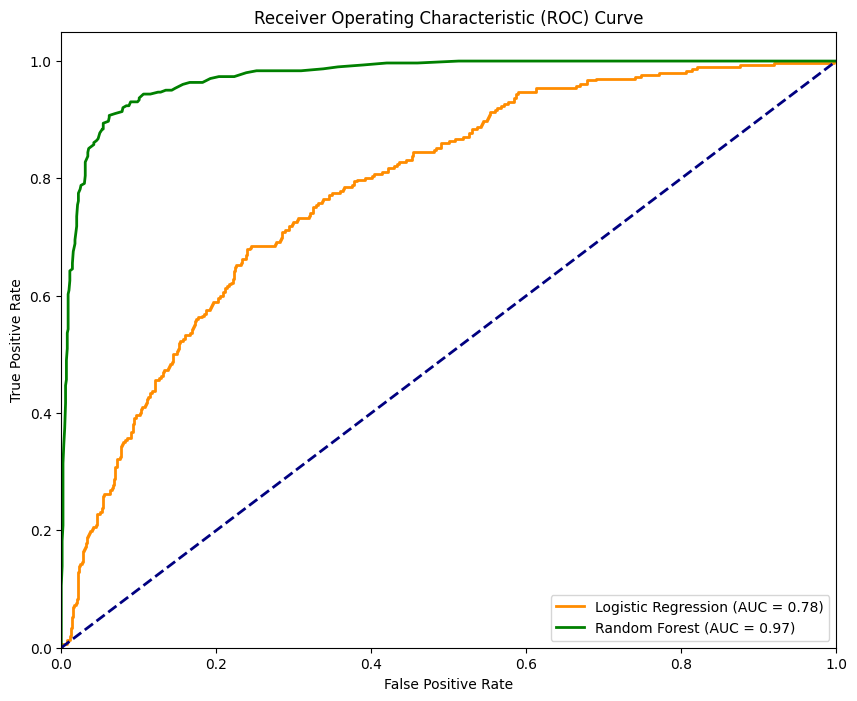

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


print("Plotting Confusion Matrix for Logistic Regression...")
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nPlotting Confusion Matrix for Random Forest...")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("\nPlotting ROC AUC Curve for both models...")
plt.figure(figsize=(10, 8))


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, log_reg_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

--- Feature Importances from Random Forest ---
     Feature  Importance
1  Longitude    0.315510
0   Latitude    0.289960
2       time    0.138546
3  Elevation    0.130050
4      Slope    0.115057
5   distance    0.010877


C:\Users\hp\AppData\Local\Temp\ipykernel_15188\842493311.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


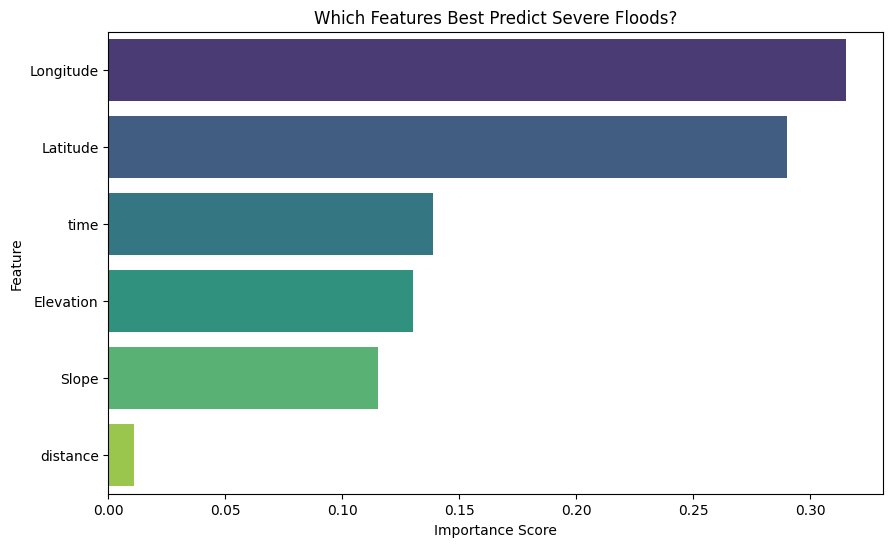

In [55]:

importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False) 

print("--- Feature Importances from Random Forest ---")
print(feature_importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Features Best Predict Severe Floods?')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

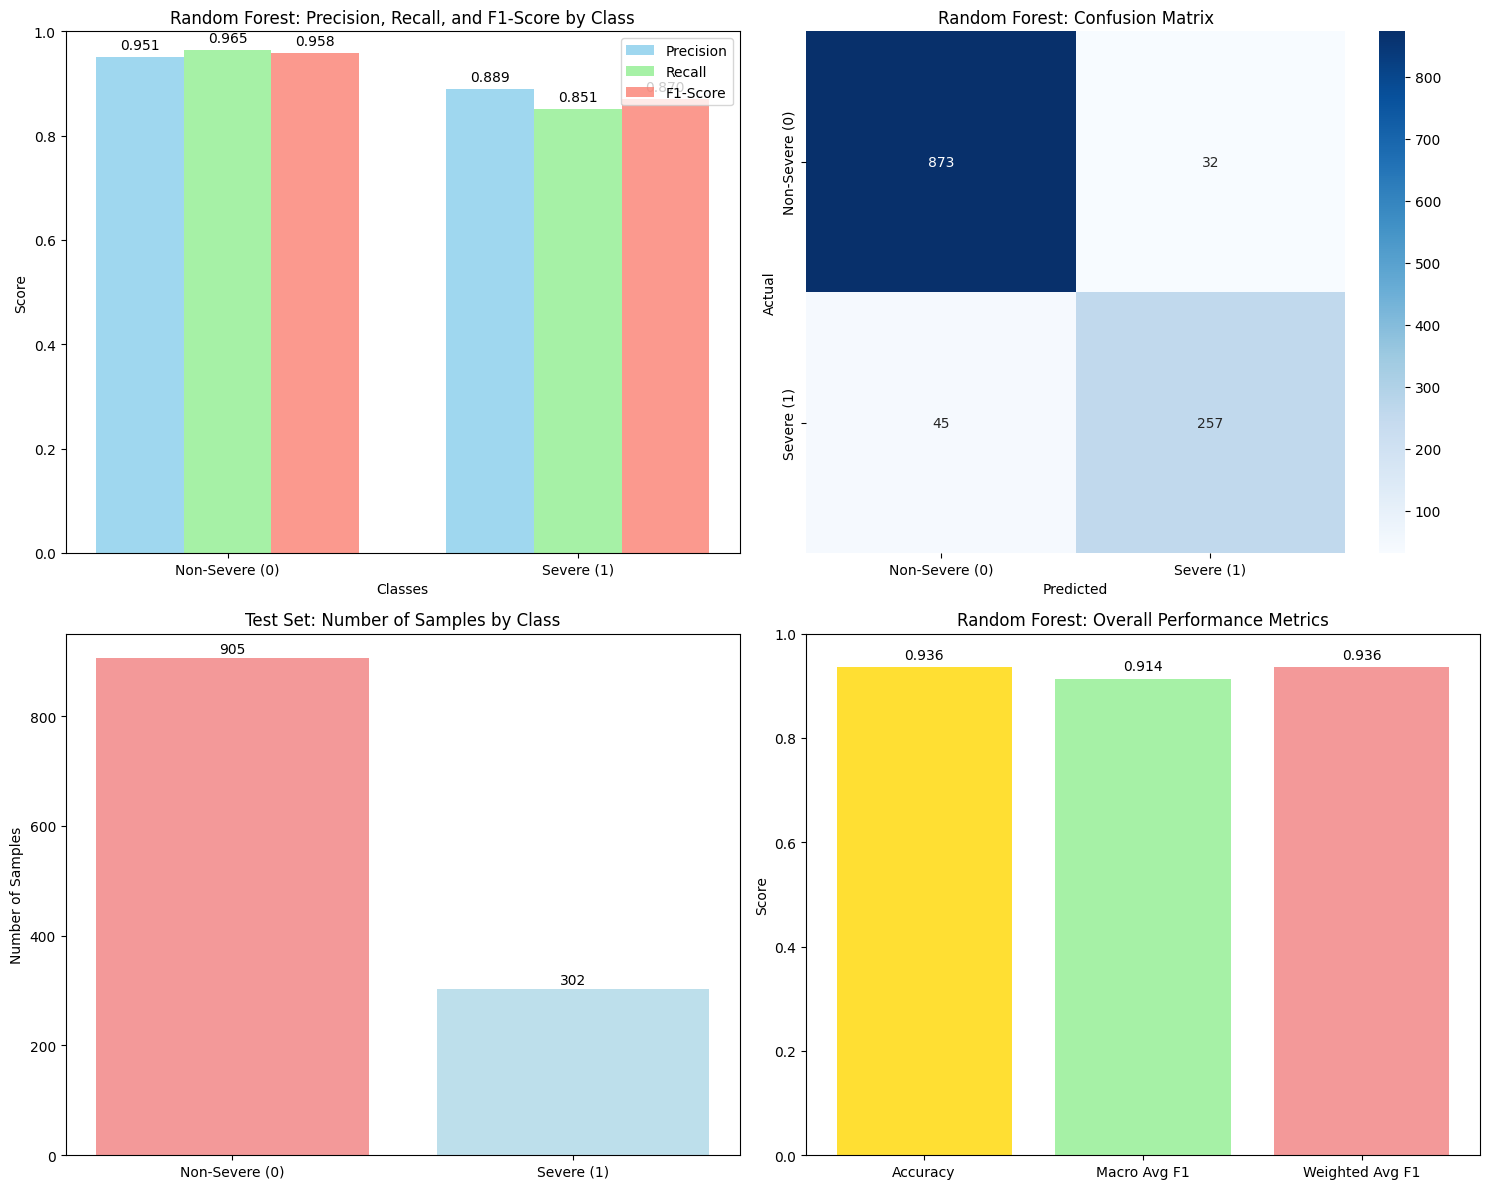

RANDOM FOREST - DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       905
           1       0.89      0.85      0.87       302

    accuracy                           0.94      1207
   macro avg       0.92      0.91      0.91      1207
weighted avg       0.94      0.94      0.94      1207


Model Accuracy: 0.9362
ROC AUC Score: 0.9732


In [57]:
# Create a comprehensive classification report plot for Random Forest
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Extract metrics from classification report
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
classes = ['Non-Severe (0)', 'Severe (1)']
precision = [report_dict['0']['precision'], report_dict['1']['precision']]
recall = [report_dict['0']['recall'], report_dict['1']['recall']]
f1_score = [report_dict['0']['f1-score'], report_dict['1']['f1-score']]
support = [report_dict['0']['support'], report_dict['1']['support']]

# Plot 1: Precision, Recall, and F1-Score by Class
x = range(len(classes))
width = 0.25

bars = axes[0, 0].bar([i - width for i in x], precision, width, label='Precision', alpha=0.8, color='skyblue')
axes[0, 0].bar(x, recall, width, label='Recall', alpha=0.8, color='lightgreen')
axes[0, 0].bar([i + width for i in x], f1_score, width, label='F1-Score', alpha=0.8, color='salmon')

axes[0, 0].set_xlabel('Classes')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Random Forest: Precision, Recall, and F1-Score by Class')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(classes)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1)

# Add value labels on bars
for i, v in enumerate(precision):
    axes[0, 0].text(i - width, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
for i, v in enumerate(recall):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
for i, v in enumerate(f1_score):
    axes[0, 0].text(i + width, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Plot 2: Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes, ax=axes[0, 1])
axes[0, 1].set_title('Random Forest: Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Plot 3: Support (Number of samples)
axes[1, 0].bar(classes, support, color=['lightcoral', 'lightblue'], alpha=0.8)
axes[1, 0].set_title('Test Set: Number of Samples by Class')
axes[1, 0].set_ylabel('Number of Samples')
for i, v in enumerate(support):
    axes[1, 0].text(i, v + 5, f'{int(v)}', ha='center', va='bottom')

# Plot 4: Overall Performance Metrics
overall_metrics = ['Accuracy', 'Macro Avg F1', 'Weighted Avg F1']
overall_values = [
    accuracy_rf,
    report_dict['macro avg']['f1-score'],
    report_dict['weighted avg']['f1-score']
]

bar = axes[1, 1].bar(overall_metrics, overall_values, color=['gold', 'lightgreen', 'lightcoral'], alpha=0.8)
axes[1, 1].set_title('Random Forest: Overall Performance Metrics')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_ylim(0, 1)

# Add value labels
for i, (bar, value) in enumerate(zip(axes[1, 1].patches, overall_values)):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, value + 0.01, f'{value:.3f}', 
                   ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed classification report
print("=" * 60)
print("RANDOM FOREST - DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print(class_report_rf)
print(f"\nModel Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")